In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import random

sys.path.append(os.path.abspath(".."))

from data.utils.preprocessor import DataPreprocessor

## Generate and Preprocess Data

In [2]:
DataPreprocessor = DataPreprocessor(start_date="2023-01-01 00:00:00", end_date="2024-09-30 23:00:00")

In [3]:
radiation_data = DataPreprocessor.generate_radiation()
radiation_data

,Radiation
Datetime,
2023-01-01 00:00:00,0.0
2023-01-01 01:00:00,0.0
2023-01-01 02:00:00,0.0
2023-01-01 03:00:00,0.0
2023-01-01 04:00:00,0.0
...,...
2024-09-30 19:00:00,0.0
2024-09-30 20:00:00,0.0
2024-09-30 21:00:00,0.0


In [4]:
temperature_data = DataPreprocessor.generate_temperature()
temperature_data

,Temperature
Datetime,
2023-01-01 00:00:00,17.2
2023-01-01 01:00:00,17.3
2023-01-01 02:00:00,17.4
2023-01-01 03:00:00,17.7
2023-01-01 04:00:00,17.7
...,...
2024-09-30 19:00:00,27.1
2024-09-30 20:00:00,27.5
2024-09-30 21:00:00,26.2


In [5]:
building_data = DataPreprocessor.generate_building_data()
building_data

,Energy
Datetime,
2023-01-01 00:00:00,8.69
2023-01-01 01:00:00,8.42
2023-01-01 02:00:00,8.33
2023-01-01 03:00:00,9.70
2023-01-01 04:00:00,10.42
...,...
2024-09-30 19:00:00,87.77
2024-09-30 20:00:00,78.45
2024-09-30 21:00:00,63.24


In [6]:
electricitycostG2B_data, electricitycostG2V_data = DataPreprocessor.generate_electricity_cost()
electricitycostG2B_data

,c_G2B_t
Datetime,
2023-01-01 00:00:00,1.85
2023-01-01 01:00:00,1.85
2023-01-01 02:00:00,1.85
2023-01-01 03:00:00,1.85
2023-01-01 04:00:00,1.85
...,...
2024-09-30 19:00:00,5.05
2024-09-30 20:00:00,5.05
2024-09-30 21:00:00,5.05


In [7]:
electricitycostG2V_data


,c_G2V_t
Datetime,
2023-01-01 00:00:00,1.95
2023-01-01 01:00:00,1.95
2023-01-01 02:00:00,1.95
2023-01-01 03:00:00,1.95
2023-01-01 04:00:00,1.95
...,...
2024-09-30 19:00:00,8.35
2024-09-30 20:00:00,8.35
2024-09-30 21:00:00,8.35


In [ ]:
# battery_series, battery_series_with_nan = DataPreprocessor.generate_battery_series(window_size = 30, tolerance = int(30/3))
# print(battery_series.shape, battery_series_with_nan.shape)

# battery_series, battery_series_with_nan = DataPreprocessor.generate_battery_series(window_size = 36, tolerance = int(36/3))
# print(battery_series.shape, battery_series_with_nan.shape)

battery_series, battery_series_with_nan = DataPreprocessor.generate_battery_series(window_size = 48, tolerance = int(48/3))
print(battery_series.shape, battery_series_with_nan.shape)


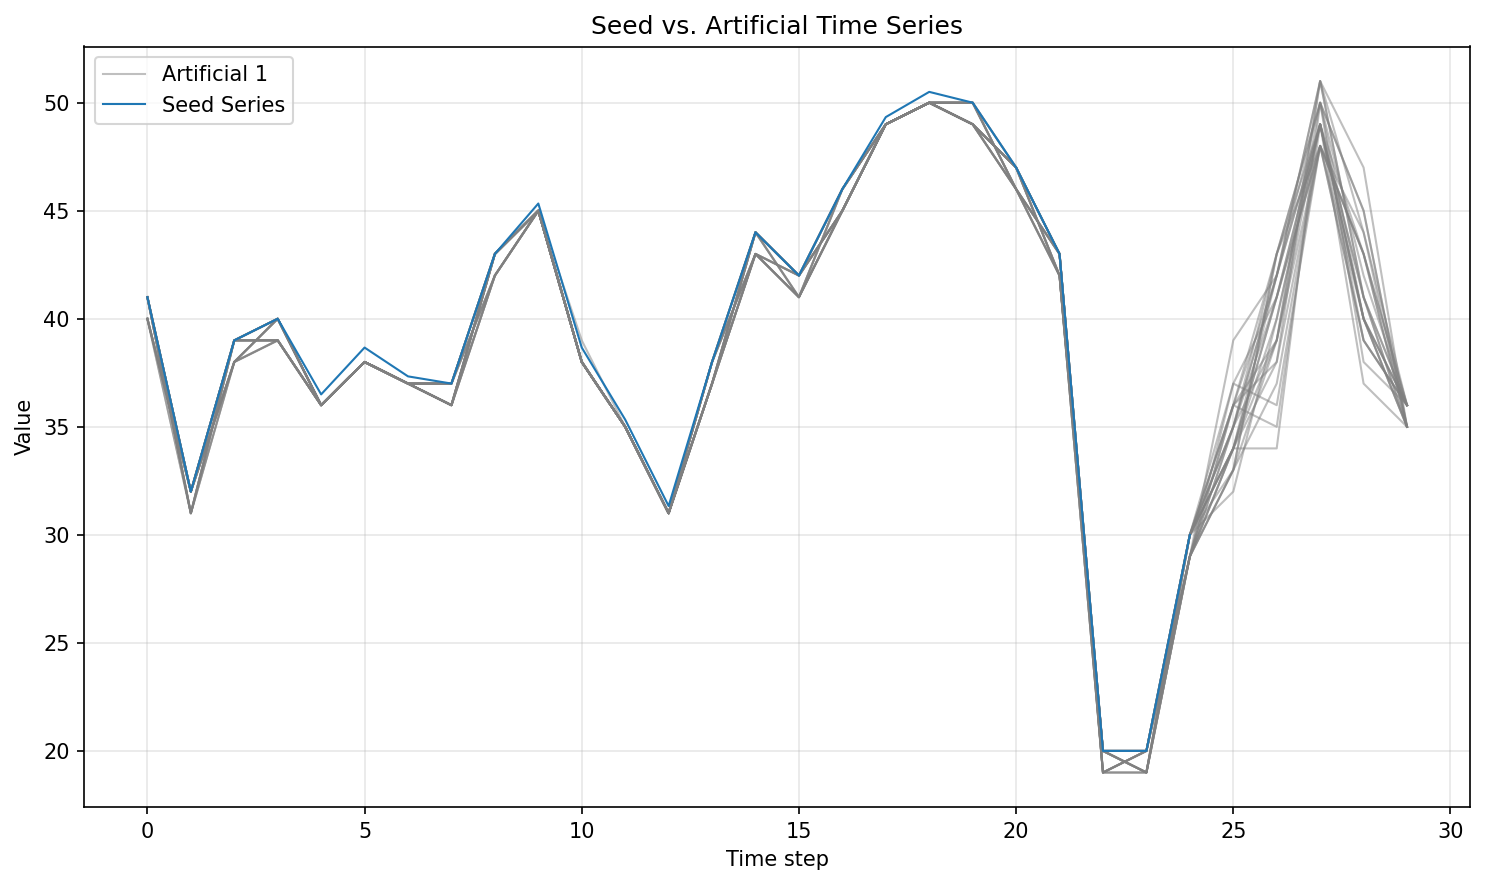

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# === Data ===
seed = np.array([41, 32., 39., 40., 36.5, 38.66666667, 37.33333333, 37., 43., 45.33333333,
                 38.66666667, 35.33333333, 31.33333333, 38., 44., 42., 46., 49.33333333,
                 50.5, 50., 47., 43., 20., 20., 30., np.nan, np.nan, np.nan, np.nan, 36.])


# === Plot ===
plt.figure(figsize=(10, 6), dpi=150)

x = np.arange(len(seed))

# Plot artificial series (light colors)
for i, s in enumerate(battery_series_with_nan, start=1):
    plt.plot(x, s, color='gray', alpha=0.5, linewidth=1.0, label=f'Artificial {i}' if i == 1 else "")

# Plot seed series (bold color)
plt.plot(x, seed, color='tab:blue', linewidth=1, label='Seed Series')

plt.title('Seed vs. Artificial Time Series')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
battery_schedule, battery_details = DataPreprocessor.generate_battery_schedule(n_station=38*2, SOC_thr=0.9, window_size=36)
battery_schedule, battery_details = DataPreprocessor.generate_battery_schedule(n_station=38*2, SOC_thr=0.9, window_size=48)

battery_schedule, battery_details = DataPreprocessor.generate_battery_schedule(n_station=38*2, SOC_thr=0.9, window_size=30)

In [ ]:
import numpy as np

current_battery_schedule = battery_schedule[0].copy()

print(current_battery_schedule.shape)
current_battery_schedule = current_battery_schedule[~np.isnan(current_battery_schedule).any(axis=1)]
print(current_battery_schedule.shape)

print(current_battery_schedule[:,5]>0)
print(np.sum(current_battery_schedule[:,8]))

(243, 30)
(198, 30)
[False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False 

In [ ]:
print(battery_schedule.shape)
for i in range(5):
    print(battery_details[0][i])

(308, 243, 30)
[0.52 0.77 0.51 0.28 0.66 0.26 0.2  0.39 0.59 0.41 0.33 0.37 0.48 0.7
 0.46 0.69 0.55 0.27 0.49 0.84 0.44 0.36 0.47 0.46 0.52 0.26 0.5  0.43
 0.38 0.26 0.27 0.7  0.69 0.51 0.41 0.54 0.29 0.51 0.57 0.76 0.42 0.37
 0.56 0.64 0.3  0.82 0.63 0.73 0.57 0.81 0.83 0.55 0.87 0.66 0.71 0.41
 0.59 0.62 0.82 0.52 0.69 0.3  0.62 0.61 0.69 0.37 0.55 0.56 0.34 0.49
 0.51 0.72 0.35 0.55 0.26 0.47 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 

In [ ]:
battery_details.shape

(4, 308, 243)

#### Plot random week

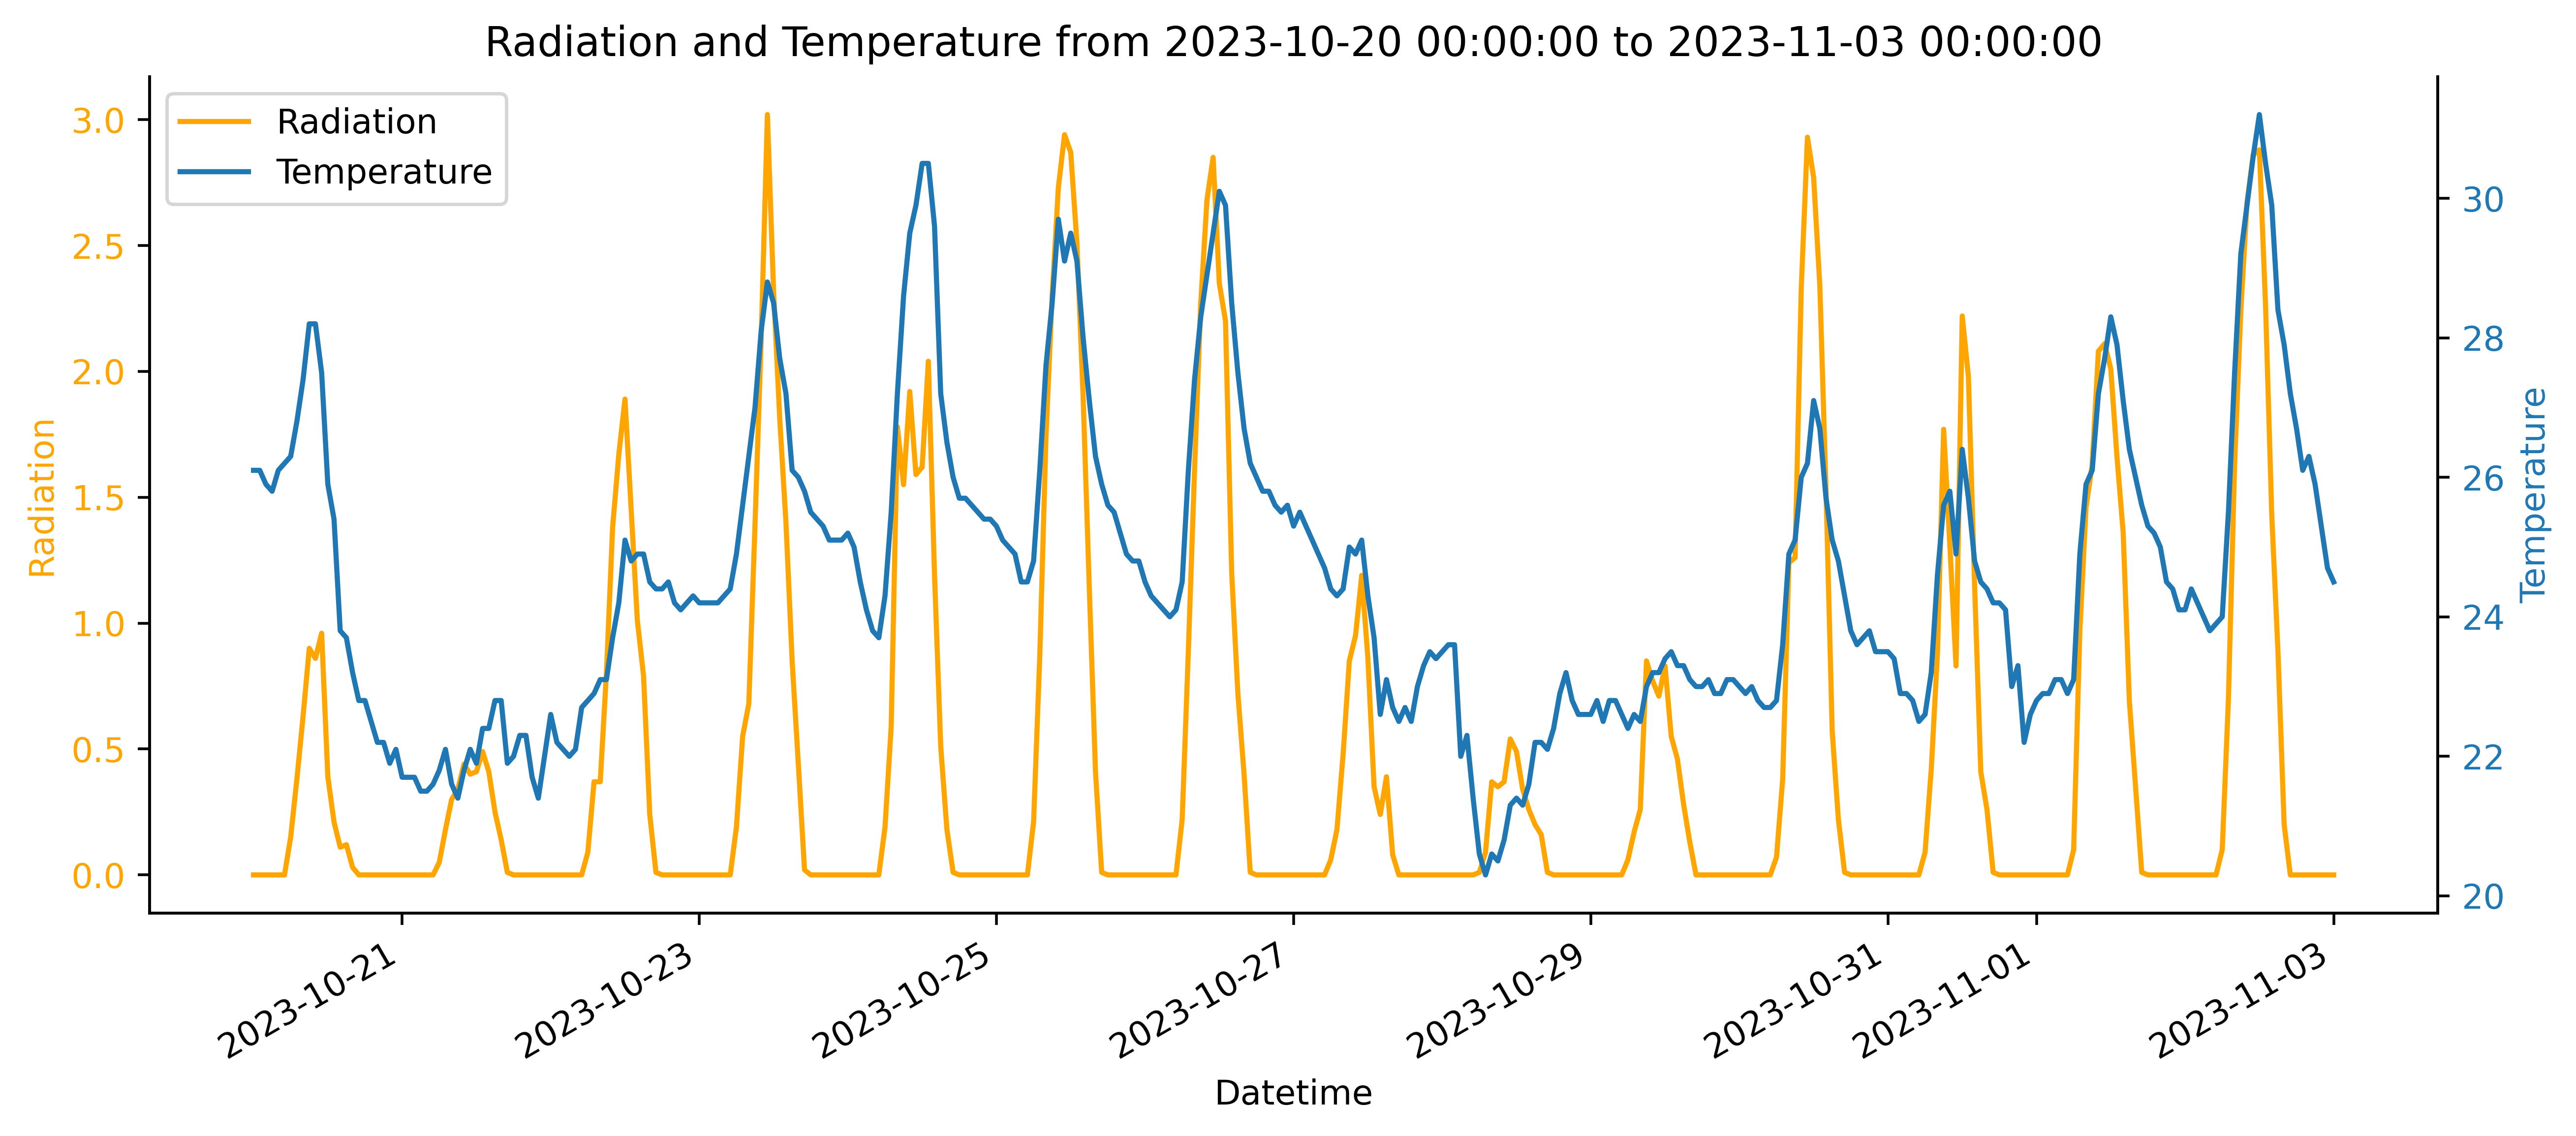

In [ ]:
# ensure datetime index
r = radiation_data.copy().iloc[:, 0]
t = temperature_data.copy().iloc[:, 0]
r.index = pd.to_datetime(r.index)
t.index = pd.to_datetime(t.index)

# determine common range
start_min = pd.to_datetime(DataPreprocessor.start_date)
end_max = pd.to_datetime(DataPreprocessor.end_date)

# pick a random week start within the available range
max_start = end_max - pd.Timedelta(days=13)
if max_start <= start_min:
    week_start = start_min
else:
    # choose a random day offset
    days_range = (max_start - start_min).days
    offset_days = random.randint(0, days_range)
    week_start = start_min + pd.Timedelta(days=offset_days)

week_end = week_start + pd.Timedelta(days=14)  # 7-day window

r_week = r.loc[week_start:week_end]
t_week = t.loc[week_start:week_end]

# plotting
fig, ax1 = plt.subplots(figsize=(12, 5), dpi=500)
ax1.plot(r_week.index, r_week.values, color='orange', label='Radiation')
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Radiation', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
ax2.plot(t_week.index, t_week.values, color='tab:blue', label='Temperature')
ax2.set_ylabel('Temperature', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left')

fig.autofmt_xdate()
for a in (ax1, ax2):
    a.spines['top'].set_visible(False)

ax1.set_title(f'Radiation and Temperature from {week_start} to {week_end}')
plt.grid(True, which='both', axis='x', linestyle='--', alpha=0.3)
plt.show()